# Cálculo da efetividade e incerteza de medição de painéis evaporativos utilizando o método de Monte Carlo

## Resfriamento evaporativo

O resfriamento evaporativo é uma alternativa ao condicionamento de ar tradicional por compressão de gás refrigerante. Conforme descreva Pereira (2017, p.30):
>O resfriamento evaporativo é o processo natural endotérmico no qual a água troca calor com o ar evaporando-se e dessa forma o resultado é a redução de temperatura de bulbo seco do ar mantendo-se constante a entalpia. Este processo é utilizado em climatizadores (industriais e residenciais) evaporativos diretos (Figura 1), que comparado com o aparelho de ar condicionado, não utilizam gases nocivos à camada de ozônio e ainda apresentam baixo consumo de energia elétrica. Um sistema de resfriamento evaporativo reduz em mais de 70% o custo total de operação, em comparação com um sistema de refrigeração mecânica, para produzir o mesmo efeito térmico (ASHRAE, 2010 apud CAROSSI, 2006).


<div align="center">
<img width="tamanho da imagem" title="titulo da imagem" src="figura1.png"/>

    Figura1 - Climatizador EB100 EcoBrisa
<div>

$~$

Neste trabalho será calculado a efetividade e respectiva incerteza utilizando o método de Monte Carlo.

## Método de Monte Carlo

O método de Monte Carlo é uma técnica estatística que utiliza simulações aleatórias repetitivas para estimar soluções de problemas matemáticos complexos, especialmente quando envolvem incertezas ou sistemas não lineares.

Segundo Metropolis e Ulam (1949), trata-se de um “procedimento estatístico para resolver problemas físicos e matemáticos através da amostragem aleatória de variáveis”.

Na prática, ele é amplamente utilizado para:

- Propagação de incertezas em equações não lineares
- Análise de risco em engenharia e finanças
- Soluções numéricas de integrais multidimensionais

Por exemplo, ao simular milhares de valores possíveis para variáveis com incerteza, é possível obter uma distribuição de saída (como eficiência térmica ou concentração de um gás), estimando média, desvio padrão e intervalos de confiança de forma realista.

De acordo com Rubinstein e Kroese (2017), o método é "particularmente útil quando os modelos matemáticos não possuem soluções exatas ou são sensíveis a pequenas variações nos dados de entrada". Conforme Albertazzi(2025), o método de Monte Carlo segue os seguintes passos:

    Passo 1 – Reunindo informações;
    Passo 2 – Atribuindo variáveis aleatórias;
    Passo 3 – Definindo o número de simulações;
    Passo 4 – Simulando;
    Passo 5 – Analisando os resultados;
    Passo 6 – Exprimindo o resultado da medição.

## Problema físico e modelagem matemática

<div align="center">
<img width="tamanho da imagem" title="titulo da imagem" src="figura4.png"/>

    Figura 2 - Problema Físico 
<div>

$~$
        
1: painel evaporativo de plástico PET 
        
2: recipiente com água
        
3: bomba de água
        
4: mangueira

5: irrigador do painel
        
Cálculo da efetividade de um painel evaporativo:

$$\huge \epsilon = \frac{(T_{ar~entrada} - T_{ar~saida})}{(T_{ar~entrada} - T_{bulbo~úmido})}$$

## Especificações dos sensores DHT 22

<div align="center">
<img width="tamanho da imagem" title="titulo da imagem" src="figura0.png"/>

    Quadro 1 - Dados DHT22 
<div>






## Painéis

Foram avaliados os painéis de celulose, PET liso (01, 02, 03) e lixado (00, 01 e 02), correspondente à ordem crescente de perda de carga e massa, conforme as condições iniciais do ar de entrada em relação a temperatura de bulbo seco e umidade relativa. Cada painel foi submetido a 3 diferentes pontos de temperaturas: 27°C, 32°C e 37°C e 3 diferentes pontos de umidade: 30%, 40%, 50%.

In [2]:
# importar pacotes
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.stats import t

# importar planilha liso 00
Liso00   = [pd.read_excel("pet_liso_00_27C.xlsx", sheet_name=None),
            pd.read_excel("pet_liso_00_32C.xlsx", sheet_name=None),
            pd.read_excel("pet_liso_00_37C.xlsx", sheet_name=None)]

# importar planilha liso 01
Liso01   = [pd.read_excel("pet_liso_01_27C.xlsx", sheet_name=None),
            pd.read_excel("pet_liso_01_32C.xlsx", sheet_name=None),
            pd.read_excel("pet_liso_01_37C.xlsx", sheet_name=None)]

# importar planilha liso 02
Liso02   = [pd.read_excel("pet_liso_02_27C.xlsx", sheet_name=None),
            pd.read_excel("pet_liso_02_32C.xlsx", sheet_name=None),
            pd.read_excel("pet_liso_02_37C.xlsx", sheet_name=None)]

# importar planilha lixado 00
Lixado00 = [pd.read_excel("pet_lixado_00_27C.xlsx", sheet_name=None),
            pd.read_excel("pet_lixado_00_32C.xlsx", sheet_name=None),
            pd.read_excel("pet_lixado_00_37C.xlsx", sheet_name=None)]

# importar planilha lixado 01
Lixado01 = [pd.read_excel("pet_lixado_01_27C.xlsx", sheet_name=None),
            pd.read_excel("pet_lixado_01_32C.xlsx", sheet_name=None),
            pd.read_excel("pet_lixado_01_37C.xlsx", sheet_name=None)]

# importar planilha lixado 02
Lixado02 = [pd.read_excel("pet_lixado_02_27C.xlsx", sheet_name=None),
            pd.read_excel("pet_lixado_02_32C.xlsx", sheet_name=None),
            pd.read_excel("pet_lixado_02_37C.xlsx", sheet_name=None)]

# importar planilha celulose
celulose = [pd.read_excel("celulose_27C.xlsx", sheet_name=None),
            pd.read_excel("celulose_32C.xlsx", sheet_name=None),
            pd.read_excel("celulose_37C.xlsx", sheet_name=None)]

In [13]:
Lixado01[2]["30"]
# intervalo de tempo do ponto de dado (Tempo), 
# Temperatura de entrada (Te), 
# temperatura de saída (Ts) 
# umidade relativa do ar de entrada (Ure)
# umidade relativa do ar de saída (Urs)
# temperatura da água (Ta)
# temperatura de bulbo úmido (Tbu) (calculada)
# efetividade de resfriamento (E)
# coeficiente de transferência de calor (hc)
# coeficiente de transferência de massa (hm)
# número de Nusselt (Nus) 
# número de Sherwood (Sh).
# número de Prandtl na superfície (Nus) 
# número de Schmidt na superfície (Shc)
# área úmida (Aumida)
# viscosidade cinemática (v)

,Tempo,Te,Ure,Ts,Urs,Ta,Tbu,E,hc,hm,Nus,Sh,Pr,Sc,Prs,Scr,Aumida,v
0,60,37.1,0.30,26.4,0.89,23.9,22.5,0.735,53.75,0.0114,11.93,2.168,0.7252,0.6154,0.7284,0.624,2.78,0.000019
1,120,37.1,0.30,26.4,0.89,23.9,22.5,0.735,53.75,0.0114,11.93,2.168,0.7252,0.6154,0.7284,0.624,2.78,0.000019
2,180,37.0,0.30,26.3,0.89,23.9,22.5,0.736,53.93,0.0113,11.97,2.163,0.7252,0.6154,0.7284,0.624,2.78,0.000019
3,240,37.0,0.30,26.3,0.89,23.9,22.5,0.736,53.93,0.0113,11.97,2.163,0.7252,0.6154,0.7284,0.624,2.78,0.000019
4,300,36.9,0.30,26.3,0.89,23.9,22.4,0.731,53.11,0.0113,11.79,2.168,0.7252,0.6155,0.7284,0.624,2.78,0.000019
5,360,37.0,0.30,26.3,0.89,23.9,22.5,0.736,53.93,0.0113,11.97,2.163,0.7252,0.6154,0.7284,0.624,2.78,0.000019
6,420,37.0,0.30,26.3,0.89,23.9,22.5,0.736,53.93,0.0113,11.97,2.163,0.7252,0.6154,0.7284,0.624,2.78,0.000019
7,480,37.1,0.30,26.3,0.89,23.9,22.5,0.742,54.77,0.0113,12.16,2.159,0.7252,0.6154,0.7284,0.624,2.78,0.000019
8,540,37.1,0.29,26.3,0.89,23.9,22.3,0.728,52.50,0.0114,11.65,2.176,0.7252,0.6154,0.7284,0.624,2.78,0.000019
9,600,37.1,0.29,26.3,0.89,23.9,22.3,0.728,52.50,0.0114,11.65,2.176,0.7252,0.6154,0.7284,0.624,2.78,0.000019


Efetividade painel Liso00 (27°C, 30%): 0.6085
Incerteza painel Liso00 (27°C, 30%): 0.0545 



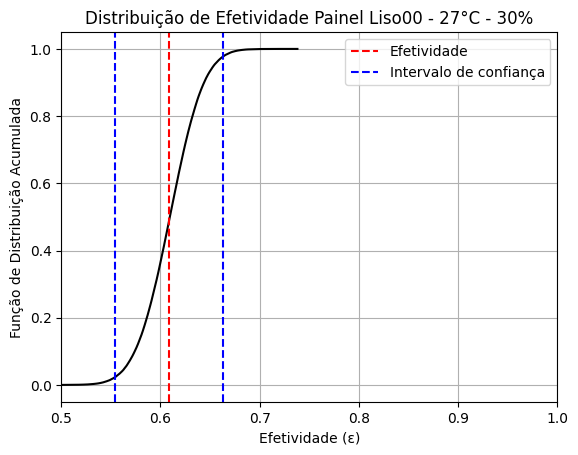

-------------------------------------------------------------------------------------- 

Efetividade painel Liso00 (27°C, 40%): 0.6335
Incerteza painel Liso00 (27°C, 40%): 0.0662 



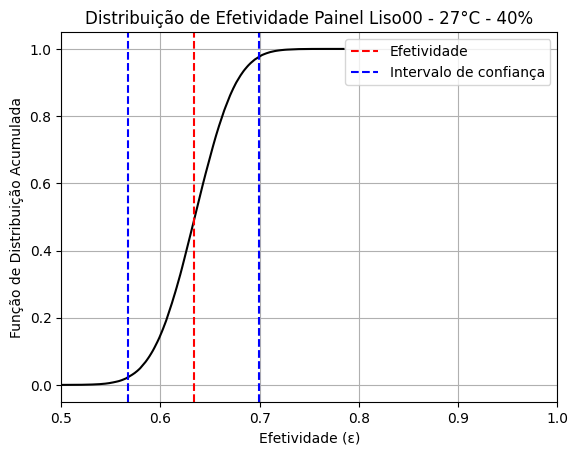

-------------------------------------------------------------------------------------- 

Efetividade painel Liso00 (27°C, 50%): 0.6376
Incerteza painel Liso00 (27°C, 50%): 0.0810 



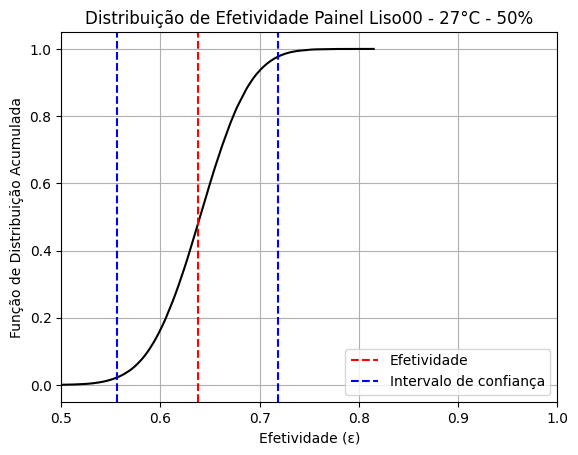

-------------------------------------------------------------------------------------- 

Efetividade painel Liso00 (32°C, 30%): 0.6197
Incerteza painel Liso00 (32°C, 30%): 0.0481 



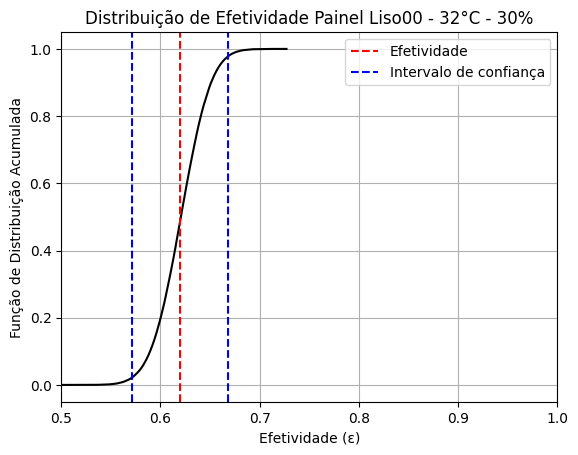

-------------------------------------------------------------------------------------- 

Efetividade painel Liso00 (32°C, 40%): 0.6098
Incerteza painel Liso00 (32°C, 40%): 0.0586 



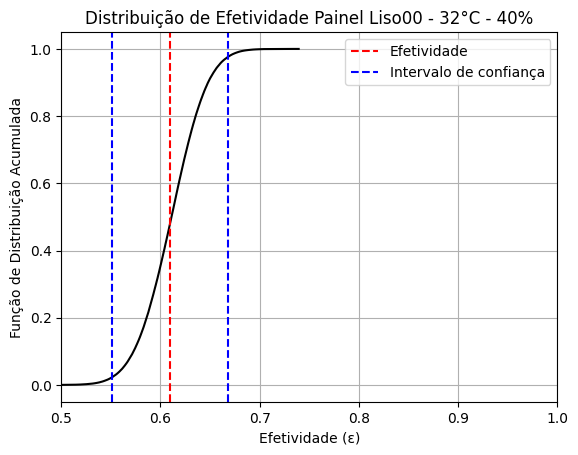

-------------------------------------------------------------------------------------- 

Efetividade painel Liso00 (32°C, 50%): 0.6402
Incerteza painel Liso00 (32°C, 50%): 0.0742 



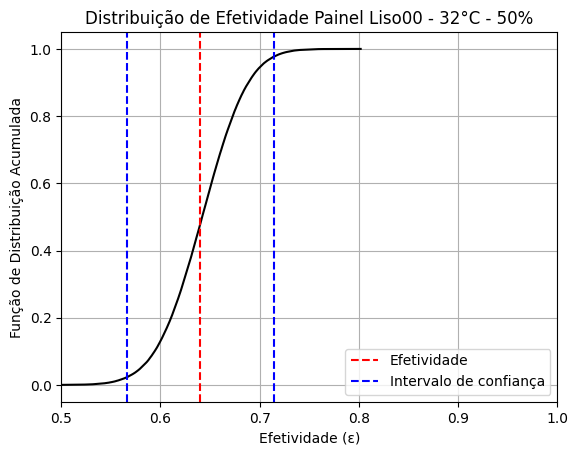

-------------------------------------------------------------------------------------- 

Efetividade painel Liso00 (37°C, 30%): 0.5971
Incerteza painel Liso00 (37°C, 30%): 0.0438 



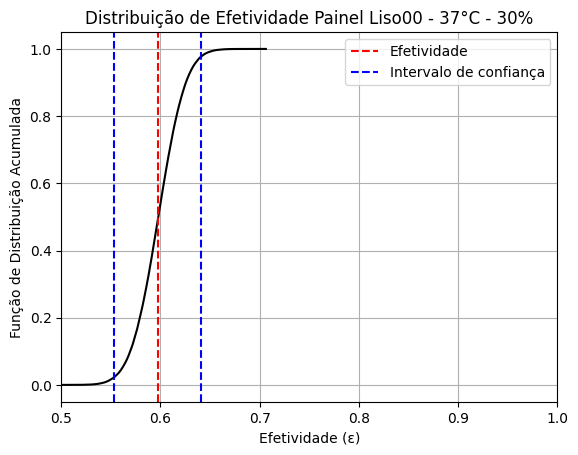

-------------------------------------------------------------------------------------- 

Efetividade painel Liso00 (37°C, 40%): 0.6357
Incerteza painel Liso00 (37°C, 40%): 0.0530 



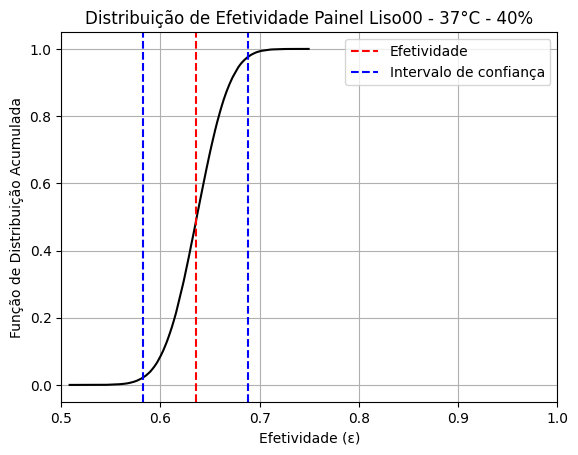

-------------------------------------------------------------------------------------- 

Efetividade painel Liso00 (37°C, 50%): 0.7042
Incerteza painel Liso00 (37°C, 50%): 0.0656 



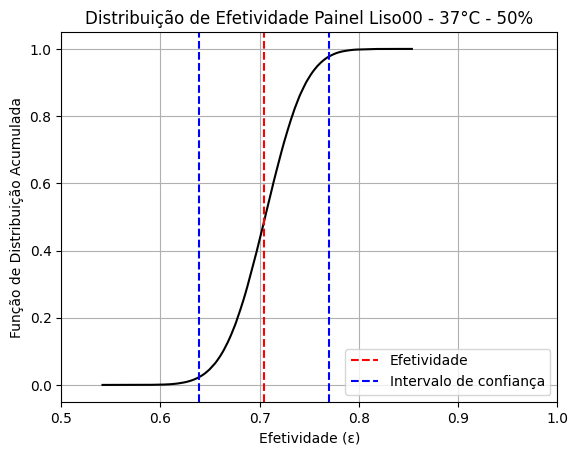

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (27°C, 30%): 0.6234
Incerteza painel Liso01 (27°C, 30%): 0.0541 



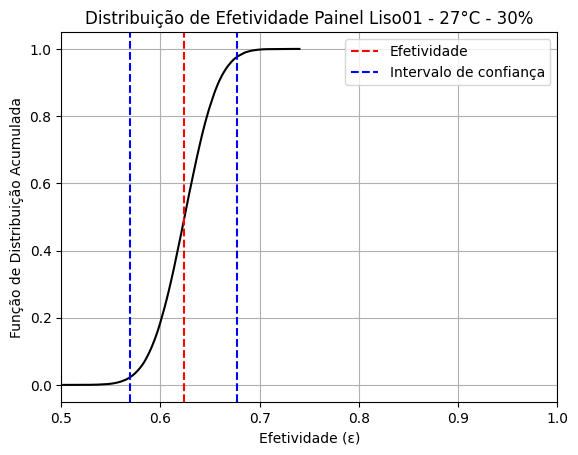

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (27°C, 40%): 0.6676
Incerteza painel Liso01 (27°C, 40%): 0.0651 



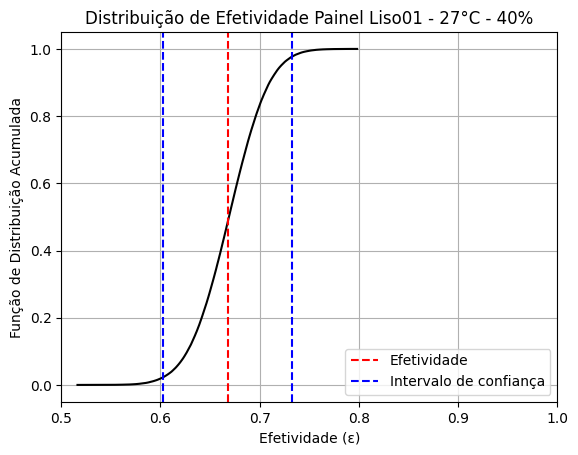

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (27°C, 50%): 0.7164
Incerteza painel Liso01 (27°C, 50%): 0.0784 



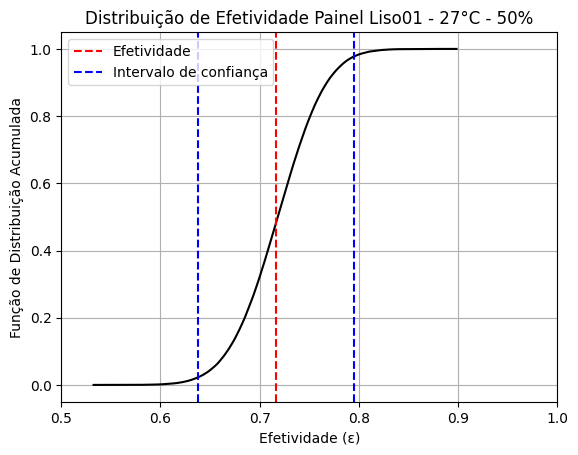

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (32°C, 30%): 0.6924
Incerteza painel Liso01 (32°C, 30%): 0.0473 



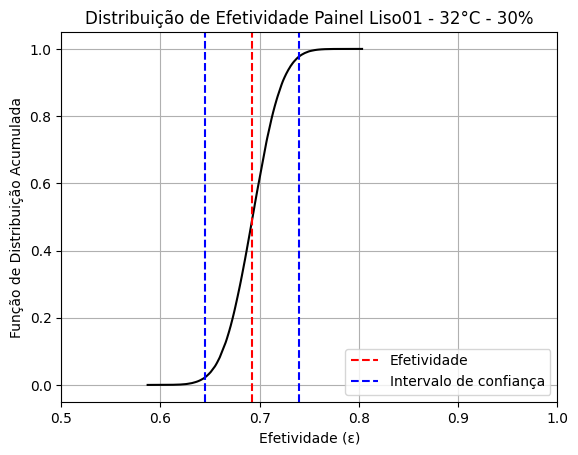

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (32°C, 40%): 0.6941
Incerteza painel Liso01 (32°C, 40%): 0.0569 



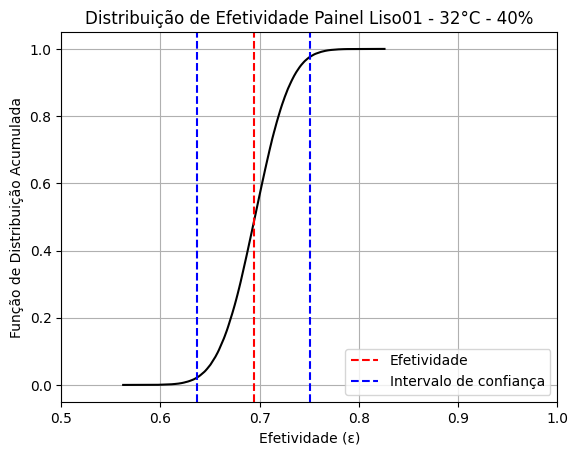

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (32°C, 50%): 0.7101
Incerteza painel Liso01 (32°C, 50%): 0.0714 



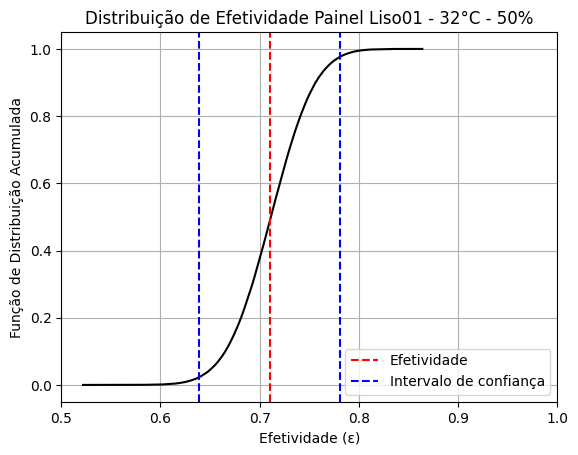

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (37°C, 30%): 0.7225
Incerteza painel Liso01 (37°C, 30%): 0.0420 



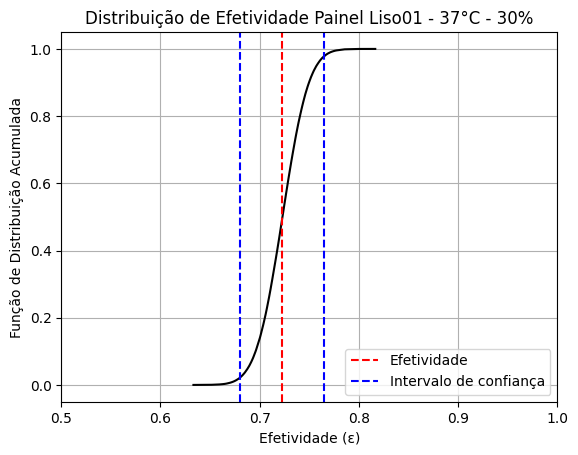

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (37°C, 40%): 0.7227
Incerteza painel Liso01 (37°C, 40%): 0.0517 



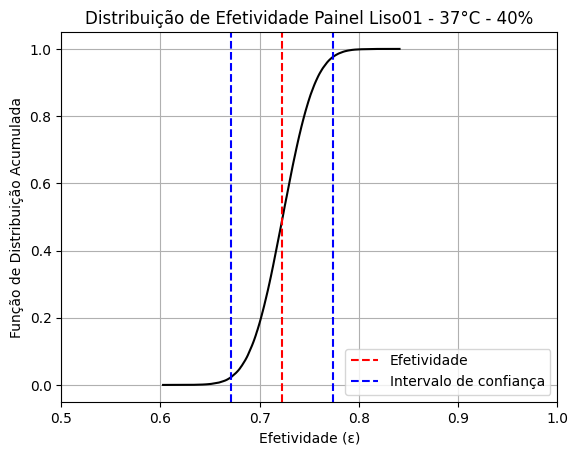

-------------------------------------------------------------------------------------- 

Efetividade painel Liso01 (37°C, 50%): 0.7459
Incerteza painel Liso01 (37°C, 50%): 0.0641 



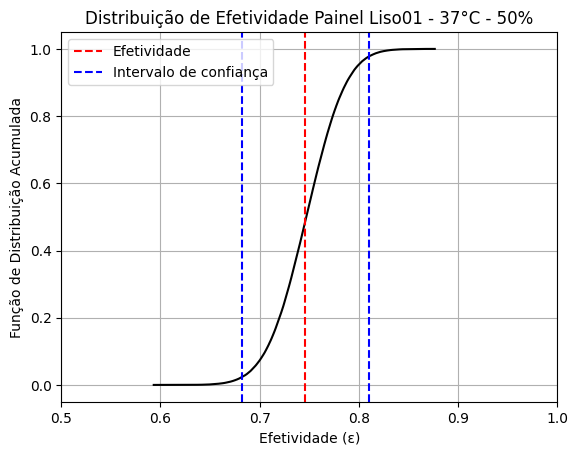

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (27°C, 30%): 0.6997
Incerteza painel Liso02 (27°C, 30%): 0.0529 



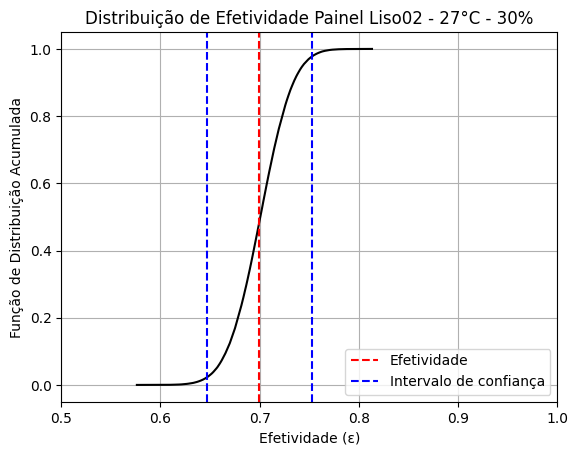

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (27°C, 40%): 0.7001
Incerteza painel Liso02 (27°C, 40%): 0.0641 



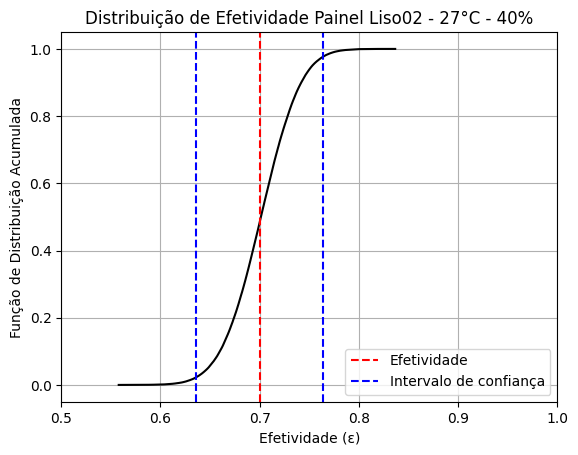

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (27°C, 50%): 0.7523
Incerteza painel Liso02 (27°C, 50%): 0.0782 



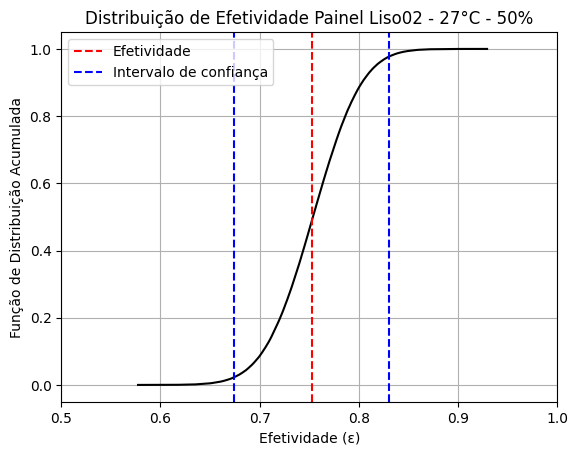

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (32°C, 30%): 0.6757
Incerteza painel Liso02 (32°C, 30%): 0.0473 



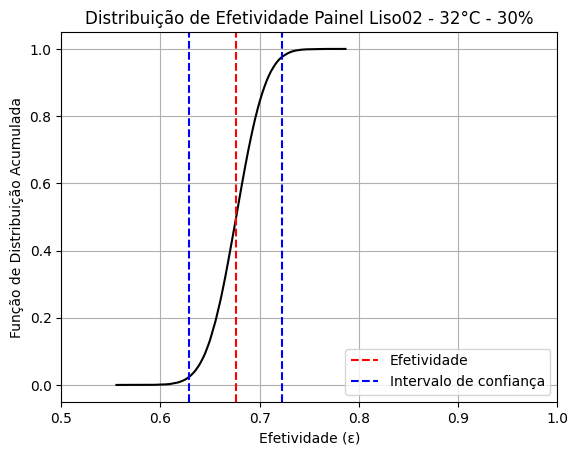

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (32°C, 40%): 0.7031
Incerteza painel Liso02 (32°C, 40%): 0.0571 



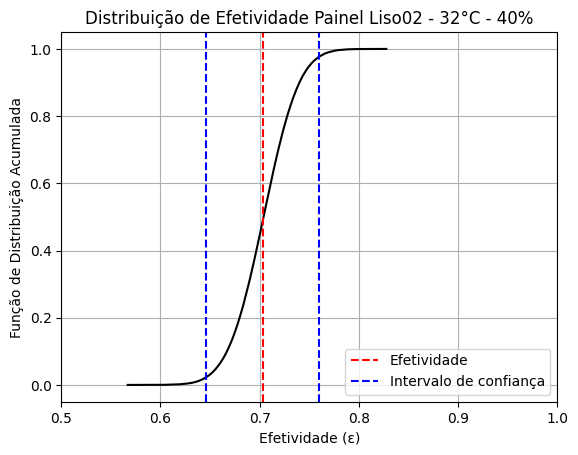

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (32°C, 50%): 0.7732
Incerteza painel Liso02 (32°C, 50%): 0.0699 



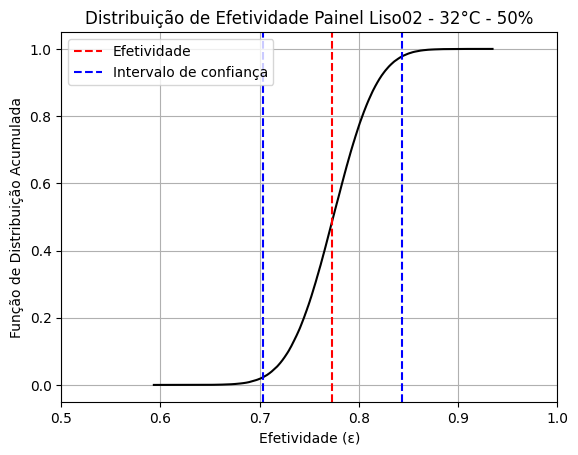

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (37°C, 30%): 0.6604
Incerteza painel Liso02 (37°C, 30%): 0.0534 



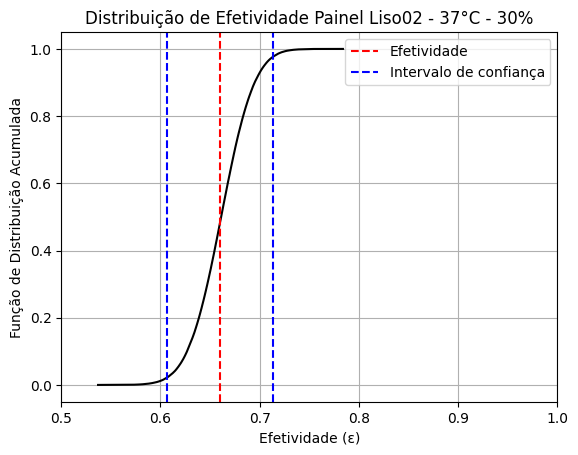

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (37°C, 40%): 0.6444
Incerteza painel Liso02 (37°C, 40%): 0.0651 



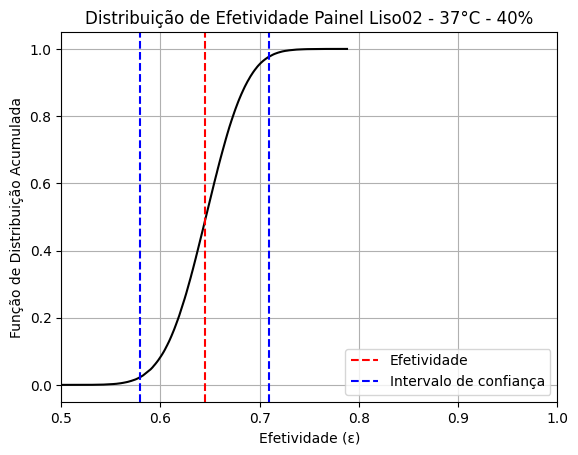

-------------------------------------------------------------------------------------- 

Efetividade painel Liso02 (37°C, 50%): 0.6821
Incerteza painel Liso02 (37°C, 50%): 0.0801 



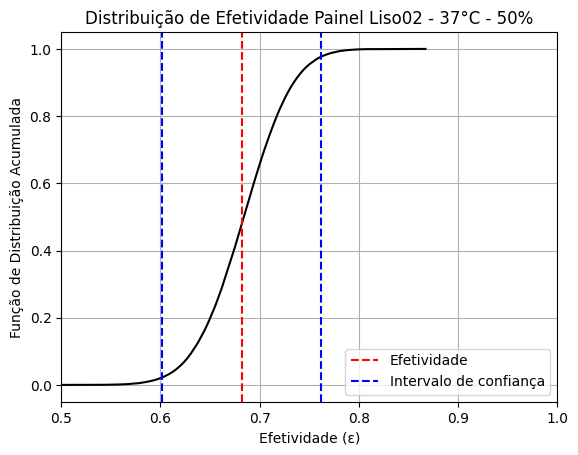

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (27°C, 30%): 0.6601
Incerteza painel Lixada00 (27°C, 30%): 0.0534 



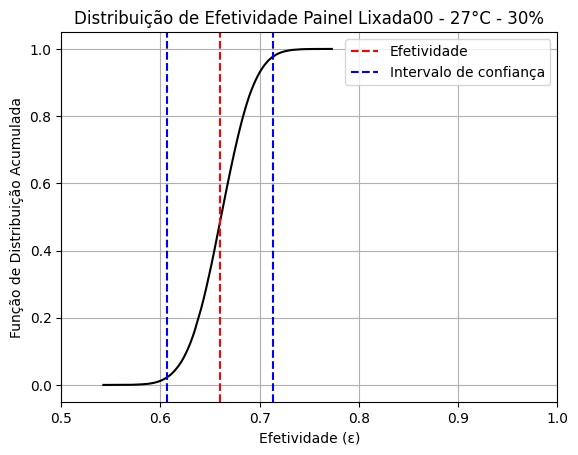

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (27°C, 40%): 0.6445
Incerteza painel Lixada00 (27°C, 40%): 0.0651 



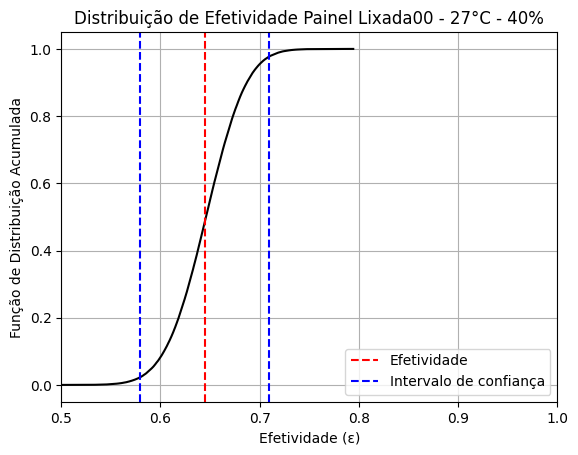

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (27°C, 50%): 0.6821
Incerteza painel Lixada00 (27°C, 50%): 0.0799 



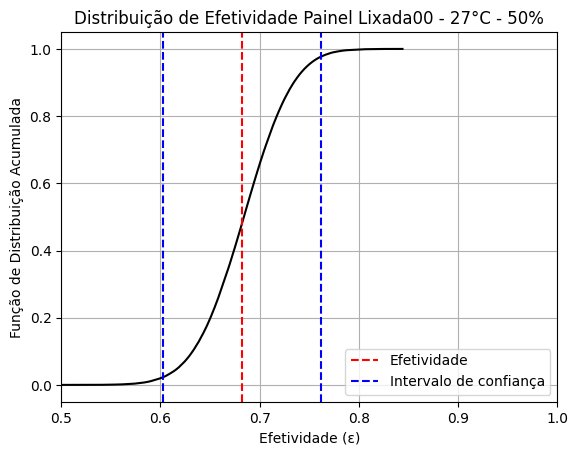

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (32°C, 30%): 0.6560
Incerteza painel Lixada00 (32°C, 30%): 0.0480 



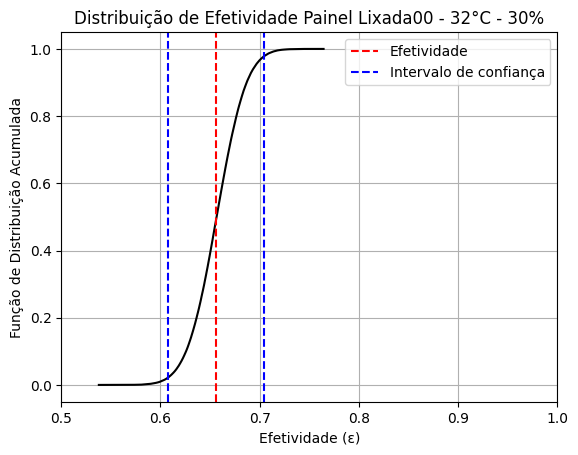

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (32°C, 40%): 0.6341
Incerteza painel Lixada00 (32°C, 40%): 0.0583 



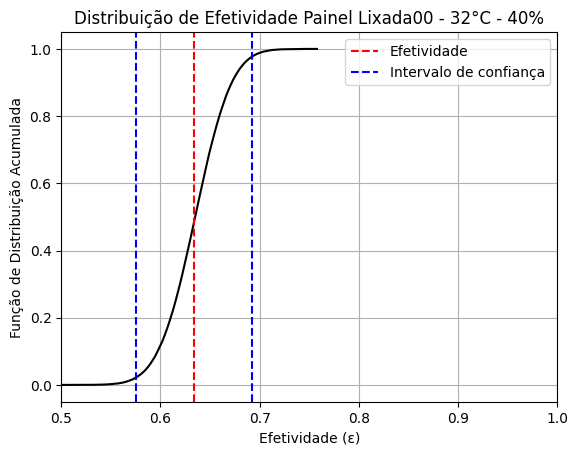

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (32°C, 50%): 0.6491
Incerteza painel Lixada00 (32°C, 50%): 0.0728 



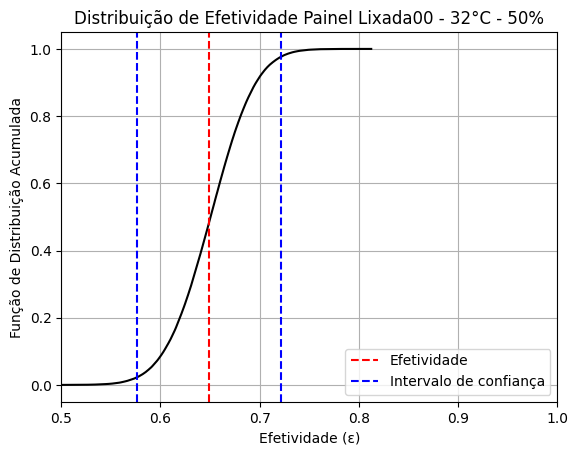

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (37°C, 30%): 0.6451
Incerteza painel Lixada00 (37°C, 30%): 0.0432 



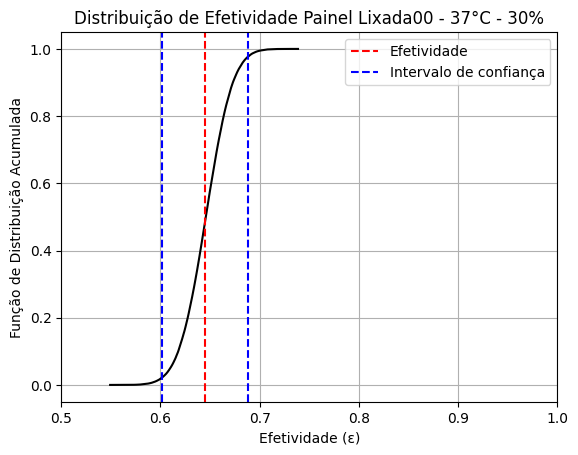

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (37°C, 40%): 0.6669
Incerteza painel Lixada00 (37°C, 40%): 0.0523 



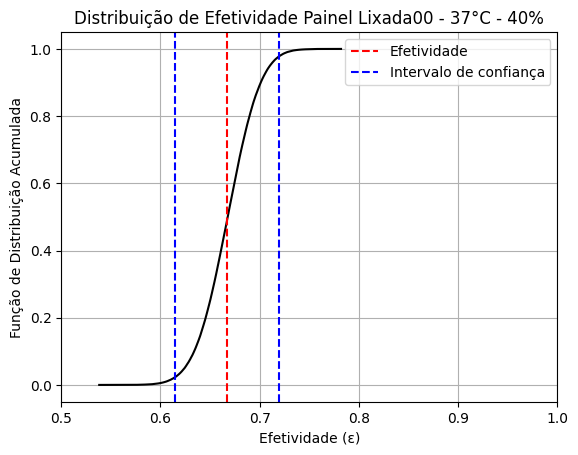

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada00 (37°C, 50%): 0.7212
Incerteza painel Lixada00 (37°C, 50%): 0.0643 



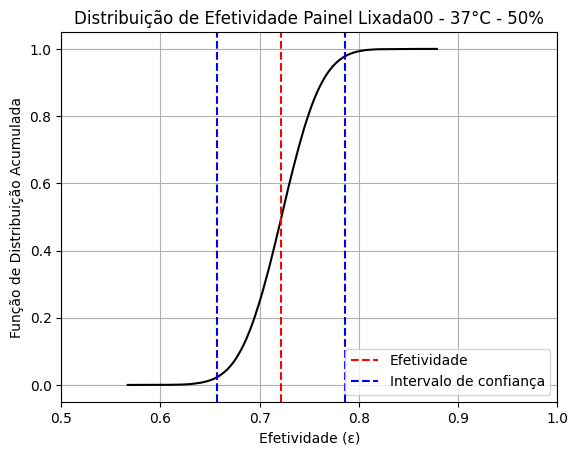

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (27°C, 30%): 0.6937
Incerteza painel Lixada01 (27°C, 30%): 0.0530 



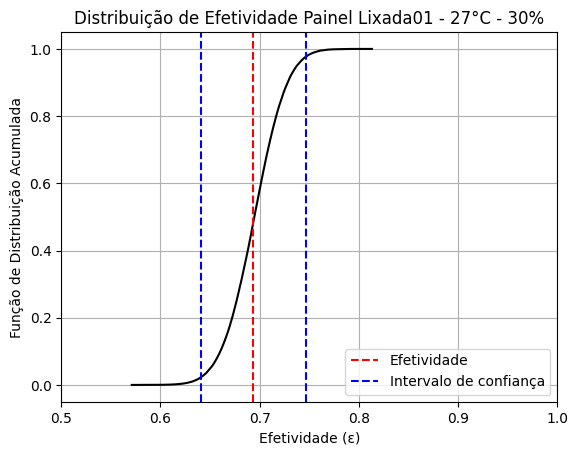

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (27°C, 40%): 0.6819
Incerteza painel Lixada01 (27°C, 40%): 0.0645 



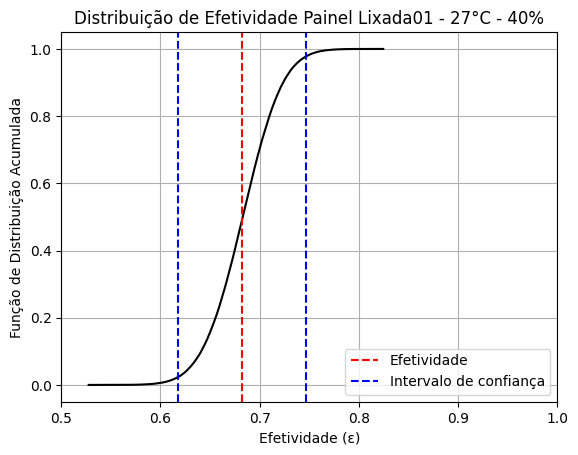

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (27°C, 50%): 0.7160
Incerteza painel Lixada01 (27°C, 50%): 0.0788 



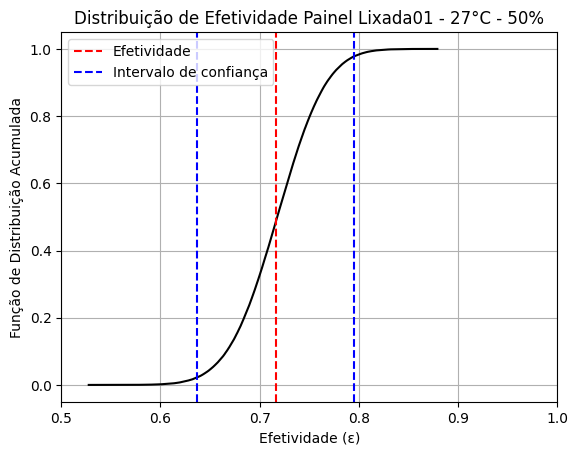

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (32°C, 30%): 0.7082
Incerteza painel Lixada01 (32°C, 30%): 0.0473 



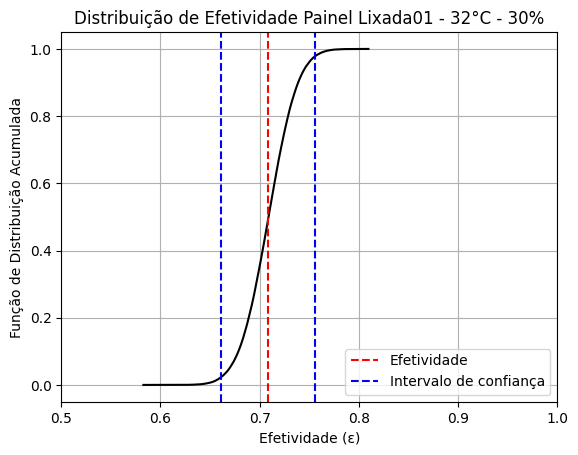

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (32°C, 40%): 0.7260
Incerteza painel Lixada01 (32°C, 40%): 0.0568 



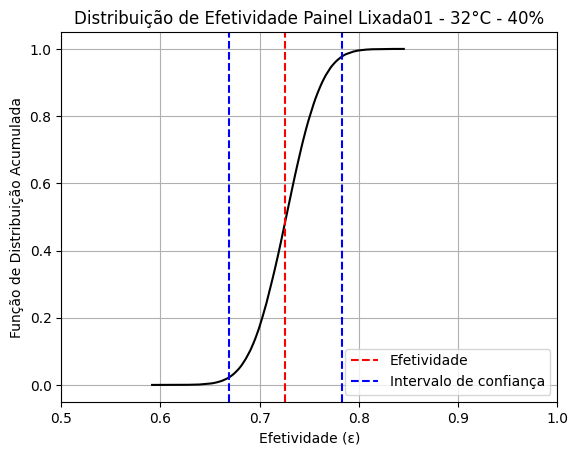

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (32°C, 50%): 0.7182
Incerteza painel Lixada01 (32°C, 50%): 0.0716 



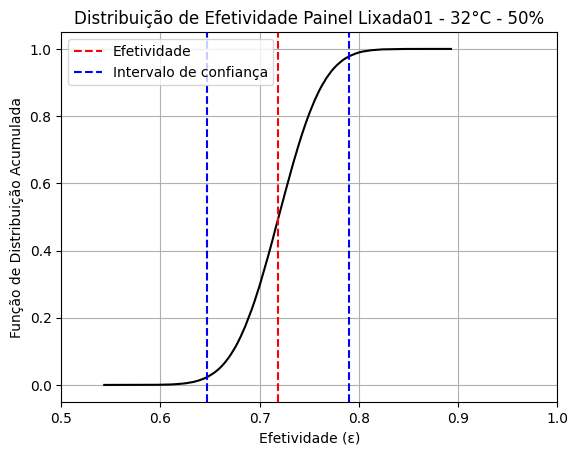

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (37°C, 30%): 0.7350
Incerteza painel Lixada01 (37°C, 30%): 0.0420 



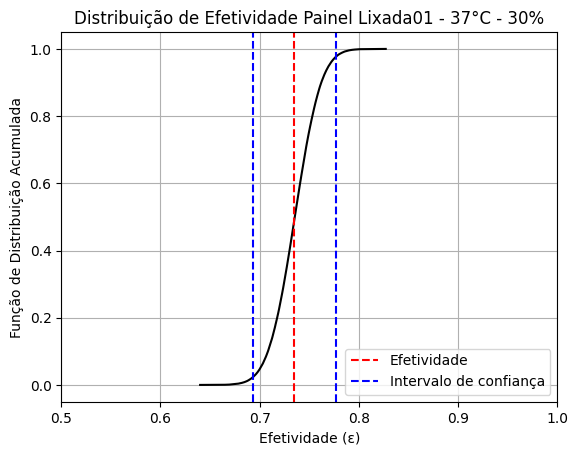

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (37°C, 40%): 0.7548
Incerteza painel Lixada01 (37°C, 40%): 0.0515 



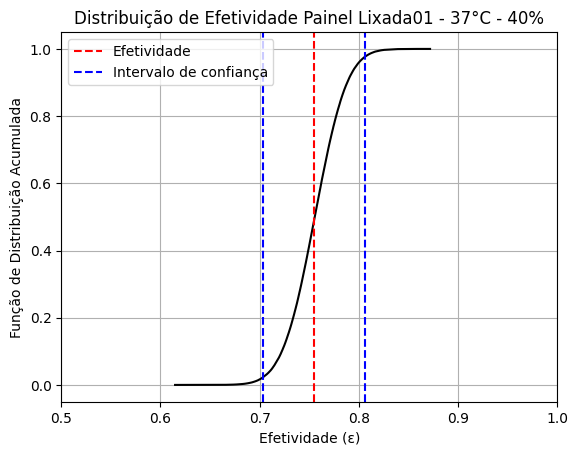

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada01 (37°C, 50%): 0.7611
Incerteza painel Lixada01 (37°C, 50%): 0.0650 



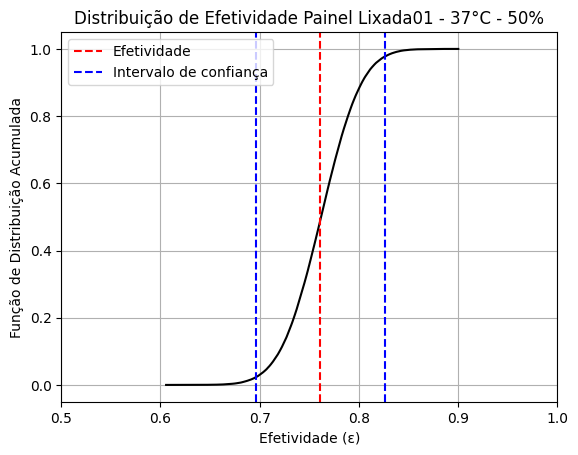

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (27°C, 30%): 0.7422
Incerteza painel Lixada02 (27°C, 30%): 0.0525 



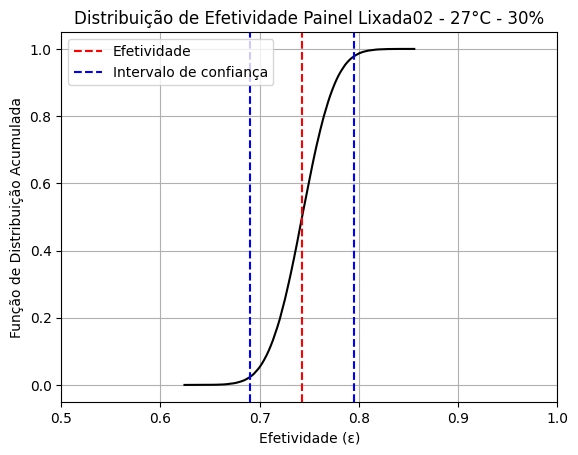

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (27°C, 40%): 0.7228
Incerteza painel Lixada02 (27°C, 40%): 0.0638 



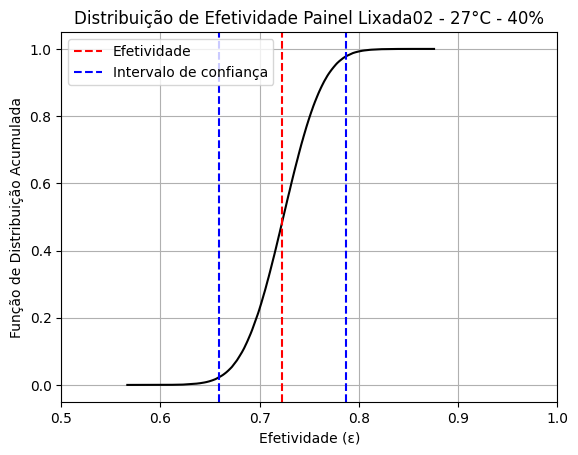

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (27°C, 50%): 0.7585
Incerteza painel Lixada02 (27°C, 50%): 0.0780 



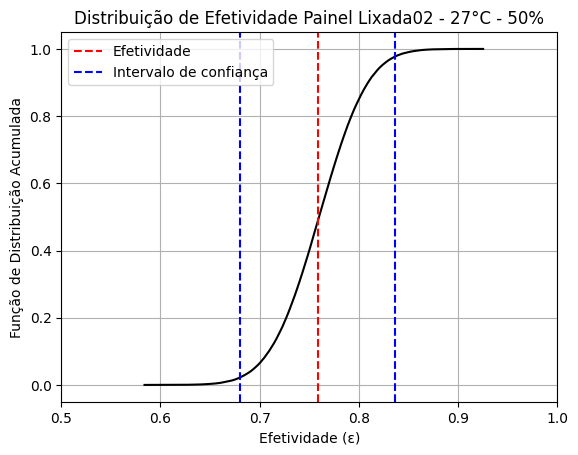

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (32°C, 30%): 0.7012
Incerteza painel Lixada02 (32°C, 30%): 0.0471 



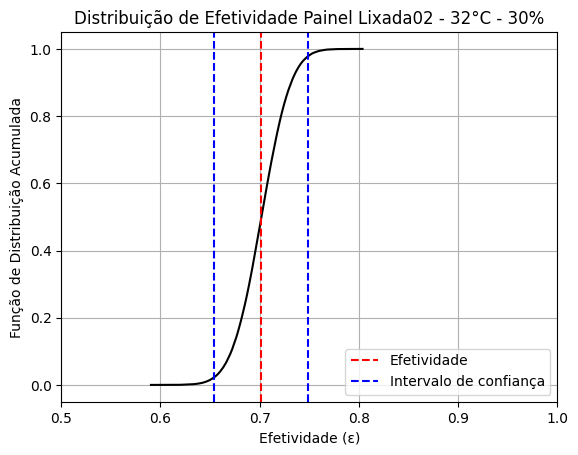

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (32°C, 40%): 0.7232
Incerteza painel Lixada02 (32°C, 40%): 0.0564 



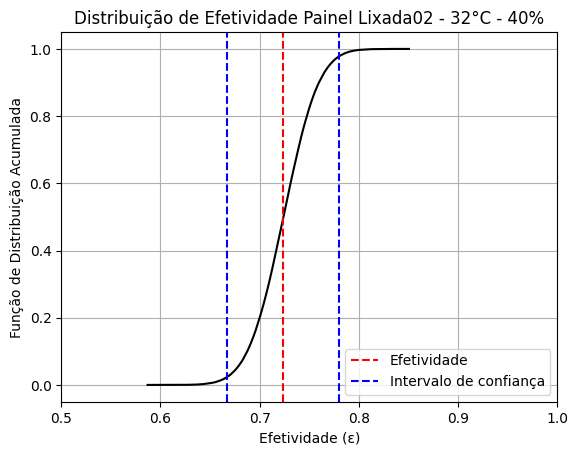

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (32°C, 50%): 0.7757
Incerteza painel Lixada02 (32°C, 50%): 0.0705 



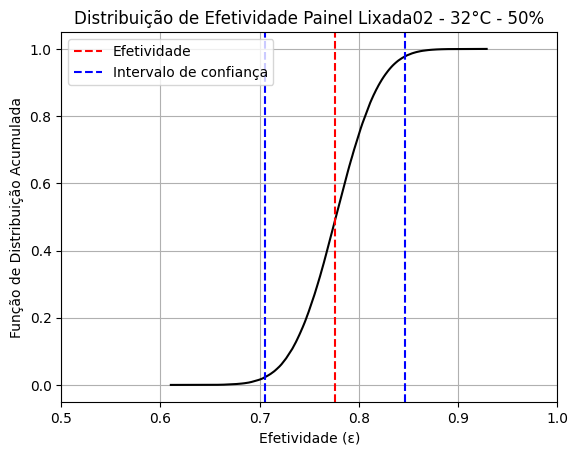

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (37°C, 30%): 0.7504
Incerteza painel Lixada02 (37°C, 30%): 0.0421 



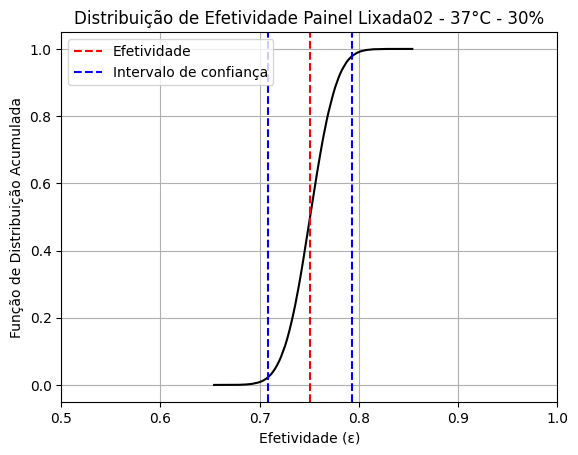

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (37°C, 40%): 0.7367
Incerteza painel Lixada02 (37°C, 40%): 0.0520 



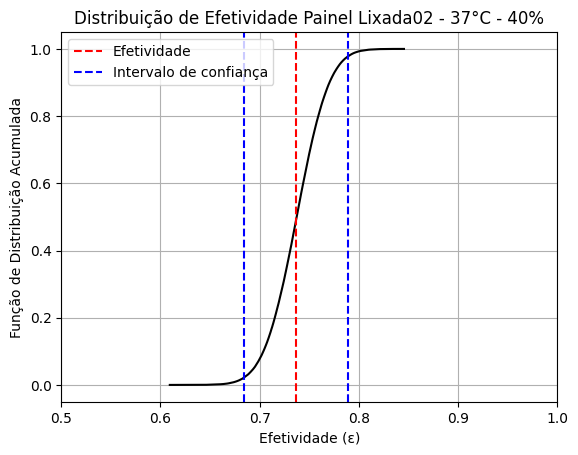

-------------------------------------------------------------------------------------- 

Efetividade painel Lixada02 (37°C, 50%): 0.8212
Incerteza painel Lixada02 (37°C, 50%): 0.0635 



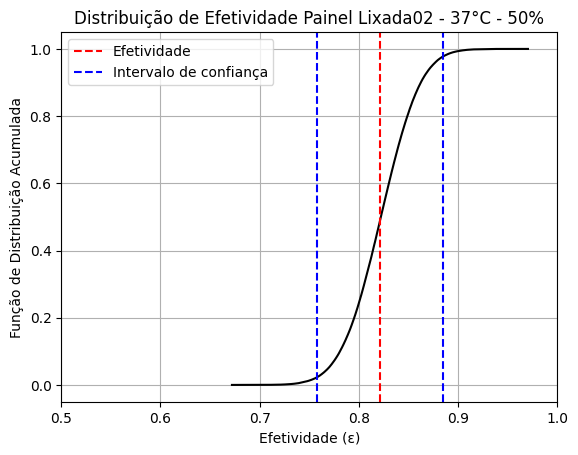

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (27°C, 30%): 0.6746
Incerteza painel Celulose (27°C, 30%): 0.0536 



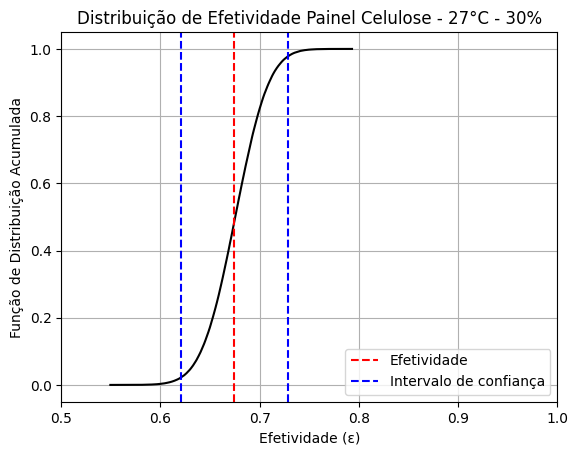

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (27°C, 40%): 0.6901
Incerteza painel Celulose (27°C, 40%): 0.0647 



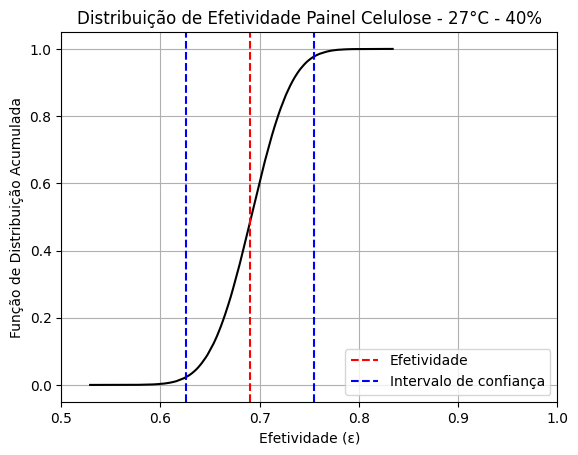

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (27°C, 50%): 0.6463
Incerteza painel Celulose (27°C, 50%): 0.0804 



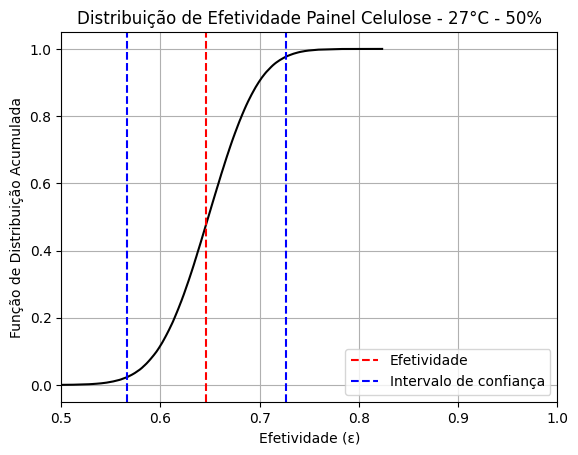

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (32°C, 30%): 0.7010
Incerteza painel Celulose (32°C, 30%): 0.0471 



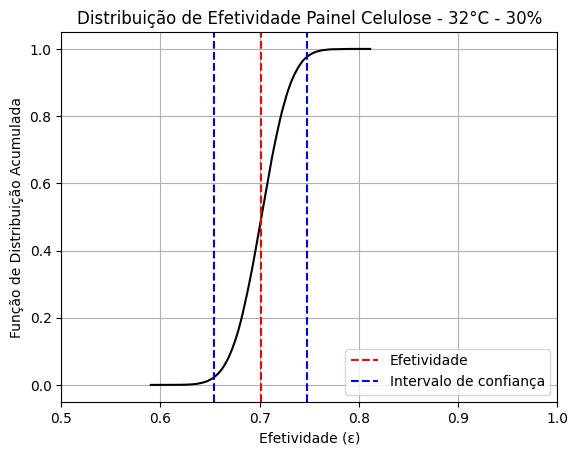

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (32°C, 40%): 0.6713
Incerteza painel Celulose (32°C, 40%): 0.0574 



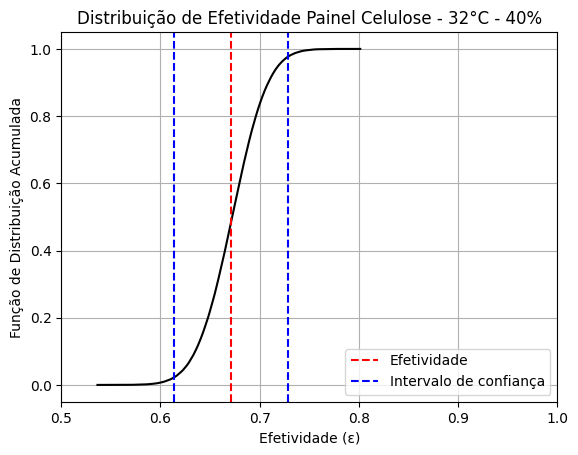

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (32°C, 50%): 0.6905
Incerteza painel Celulose (32°C, 50%): 0.0724 



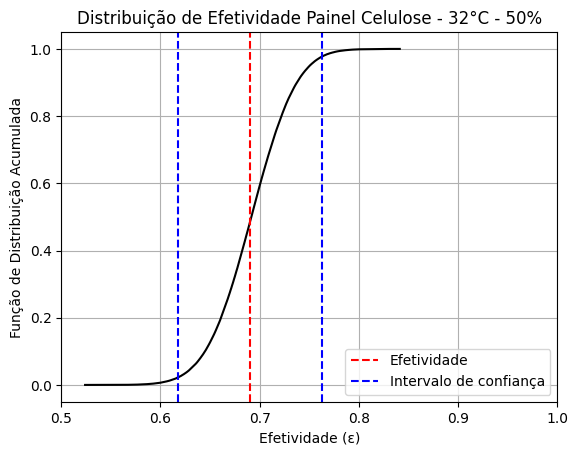

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (37°C, 30%): 0.6817
Incerteza painel Celulose (37°C, 30%): 0.0425 



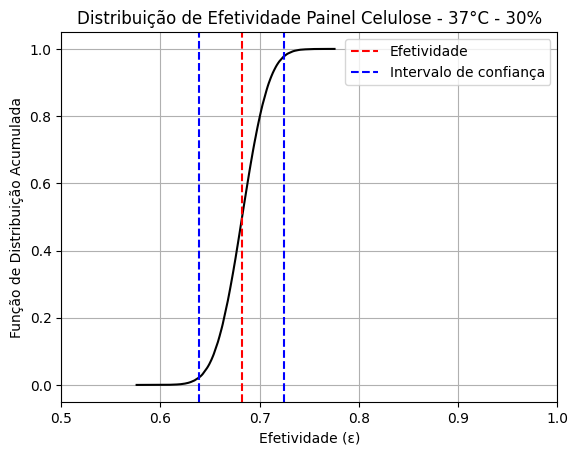

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (37°C, 40%): 0.7037
Incerteza painel Celulose (37°C, 40%): 0.0519 



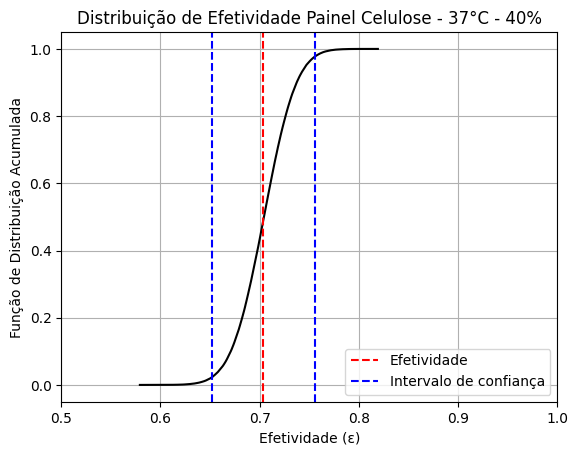

-------------------------------------------------------------------------------------- 

Efetividade painel Celulose (37°C, 50%): 0.7830
Incerteza painel Celulose (37°C, 50%): 0.0641 



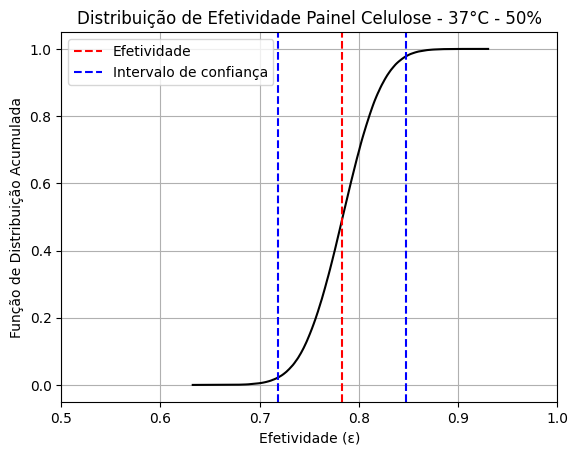

-------------------------------------------------------------------------------------- 



In [10]:
# dicionários dos painéis
paineis = {"Liso00"  :Liso00,   "Liso01"  :Liso01,   "Liso02"  :Liso02, 
           "Lixada00":Lixado00, "Lixada01":Lixado01, "Lixada02":Lixado02, 
           "Celulose":celulose}

# laço principal
for tipo_nome, tipo_indice in paineis.items():
    for temp_nome, temp_indice in {"27": 0, "32": 1, "37": 2}.items():
        for umid in ["30", "40", "50"]:
            
            # importar um painel de temperatura 'x' e umidade 'y'
            painel = tipo_indice[temp_indice][umid]
            
            # médias
            mdTe  = painel["Te"].mean() 
            mdTs  = painel["Ts"].mean()
            mdTbu = painel["Tbu"].mean()
            
            # incertezas sensor DHT22
            uResolucao = 0.1/np.sqrt(3)
            uExatidao  = 0.5/np.sqrt(3)
            
            # incerteza precisão (repetibilidade) da medição
            uPTe  = painel["Te"].std()/np.sqrt(15) 
            uPTs  = painel["Ts"].std()/np.sqrt(15)
            uPTbu = painel["Tbu"].std()/np.sqrt(15)

            # incerteza combinada
            uCombinadaTe  = np.sqrt(uResolucao**2 + uExatidao**2 + uPTe**2)
            uCombinadaTs  = np.sqrt(uResolucao**2 + uExatidao**2 + uPTs**2)
            uCombinadaTbu = np.sqrt(uPTbu**2)
         
            # incerteza medição temperatura
            UTe  = uCombinadaTe
            UTs  = uCombinadaTs
            UTbu = uCombinadaTbu
            
            # MÉTODO MONTE CARLO
                n = int(1e4 / (1 - 0.9545))
                
                # geração de amostras temperatura
                amostraTe  = np.random.normal(mdTe,  UTe,  n)
                amostraTs  = np.random.normal(mdTs,  UTs,  n)
                amostraTbu = np.random.normal(mdTbu, UTbu, n)
                
                # cálculo da efetividade
                distEpsilon = (amostraTe - amostraTs)/(amostraTe - amostraTbu)
                
                # intervalo de confiança
                Kord = np.sort(distEpsilon)
                LI   = Kord[int(n*(1 - 0.9545)/2.00)]
                LS   = Kord[int(n*(1 + 0.9545)/2.00)]

                # resultado base e incerteza
                RB_Epsilon = (LS + LI)/2
                Uepsilon   = (LS - LI)/2

            # RESULTADOS
                print(f"Efetividade painel {tipo_nome} ({temp_nome}°C, {umid}%): {RB_Epsilon:.4f}")
                print(f"Incerteza painel {tipo_nome} ({temp_nome}°C, {umid}%): {Uepsilon:.4f} \n")
                
                # gráfico
                prob_acumulada = np.linspace(0, 1, len(Kord))
                plt.plot(Kord, prob_acumulada, color='black')
                plt.xlim(0.5, 1.0)
                plt.axvline(RB_Epsilon, color='red', linestyle='--',  label='Efetividade')
                plt.axvline(LI, color='blue', linestyle='--', label='Intervalo de confiança')
                plt.axvline(LS, color='blue', linestyle='--')
                plt.title(f"Distribuição de Efetividade Painel {tipo_nome} - {temp_nome}°C - {umid}%")
                plt.xlabel("Efetividade (ε)")
                plt.ylabel("Função de Distribuição Acumulada")
                plt.legend()
                plt.grid(True)
                #plt.savefig(f"Lixado0{tipo_indice}_{temp_nome}_{umid}.png")
                plt.show()            

            print("-------------------------------------------------------------------------------------- \n")

## Referência Bibliográfica

ALBERTAZZI, Armando. **Estimativa da Incerteza de Medição pelo Método de Monte Carlo**. Notas de aulas, 2025.
METROPOLIS, N.; ULAM, S. The Monte Carlo method. **Journal of the American Statistical Association**, v. 44, n. 247, p. 335–341, 1949.

ASHRAE. ASHRAE Standard 55. 55. ed. N.E. Atlanta, 2010. Disponível em: <https://www.ashrae.org>. 

CAROSSI, G. de A. B. Resfriamento evaporativo: estudo do potencial de sua aplicação no Brasil. 2006. 127 p. Dissertação (Engenharia Mecânica) — Universidade Federal de Uberlândia. Disponível em: <https://repositorio.ufu.br/handle/123456789/14816>

RUBINSTEIN, R. Y.; KROESE, D. P. **Simulation and the Monte Carlo method**. Hoboken: John Wiley & Sons, 2017.

PEREIRA, João Marcello. **Avaliação de desempenho do painel de plástico PET para resfriamento evaporativo**. 2017. 191 f., il. Dissertação (Mestrado em Ciências Mecânicas)—Universidade de Brasília, Brasília, 2017.